# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [67]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")
transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [69]:
# TODO: view the shape of your data
transactions.shape

(1000000, 10)

In [70]:
# TODO: Begin your EDA
transactions.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,1.796208e+05,8.351184e+05,8.565104e+05,1.102856e+06,1.227859e+06,0.001297,0.000001
std,6.076181e+05,2.892918e+06,2.928896e+06,3.464915e+06,3.752688e+06,0.035991,0.001000
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.336939e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,7.443500e+04,1.411000e+04,0.000000e+00,1.331849e+05,2.148652e+05,0.000000,0.000000
75%,2.083404e+05,1.073804e+05,1.446566e+05,9.430209e+05,1.110702e+06,0.000000,0.000000
max,9.244552e+07,3.958504e+07,3.893942e+07,3.555534e+08,3.560159e+08,1.000000,1.000000


In [71]:
# Question 1: Comparing transactions 'oldbalanceOrg' and 'newbalanceOrig' amounts using hist
# Take a closer look at the numeric features in your dataset. 
# How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?
## *Hint**: Consider using visualizations that highlight frequency across value ranges.\

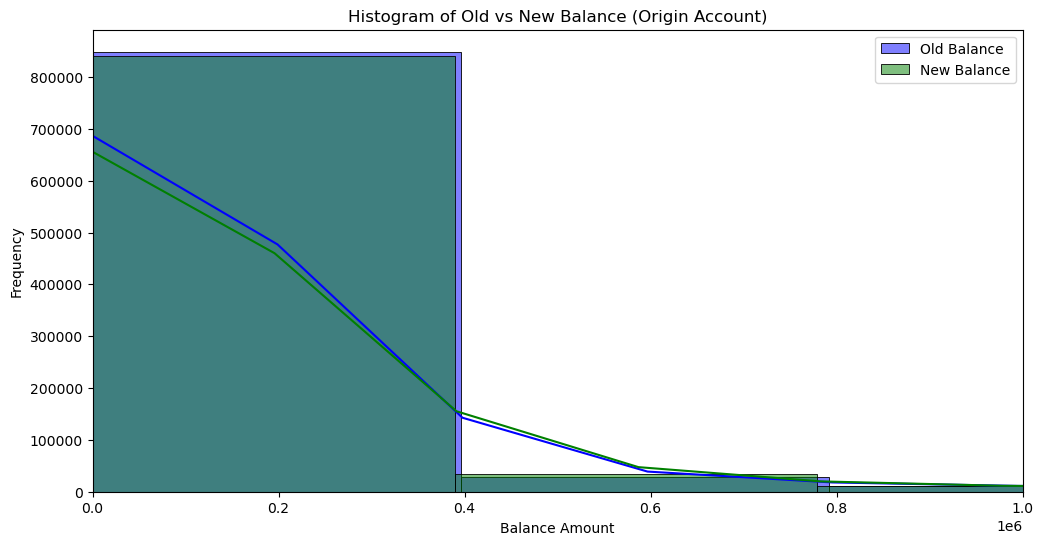

In [72]:
plt.figure(figsize=(12, 6))
sns.histplot(transactions['oldbalanceOrg'], bins=100, color='blue', label='Old Balance', kde=True)


sns.histplot(transactions['newbalanceOrig'], bins=100, color='green', label='New Balance', kde=True)
plt.xlim(0, 1_000_000)
plt.xlabel("Balance Amount")
plt.ylabel("Frequency")
plt.title("Histogram of Old vs New Balance (Origin Account)")
plt.legend()
plt.show()


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

Answer here

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

Answer here

Text(0.5, 1.0, 'Old Balance vs New Balance by Fraud Status')

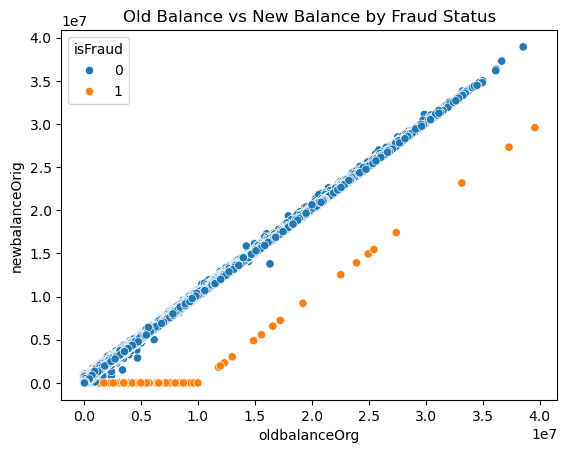

In [ ]:
# Q2:### Q2When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?
sns.scatterplot(x=transactions['oldbalanceOrg'], y=transactions['newbalanceOrig'], hue=transactions['isFraud'])
plt.title("Old Balance vs New Balance by Fraud Status")


Text(0.5, 1.0, 'Transaction Amount vs New Balance by Fraud Status')

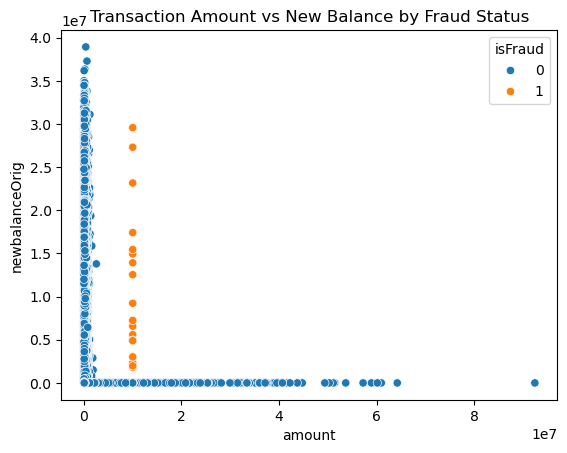

In [74]:
sns.scatterplot(x=transactions['amount'], y=transactions['newbalanceOrig'], hue=transactions['isFraud'])
plt.title("Transaction Amount vs New Balance by Fraud Status")

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

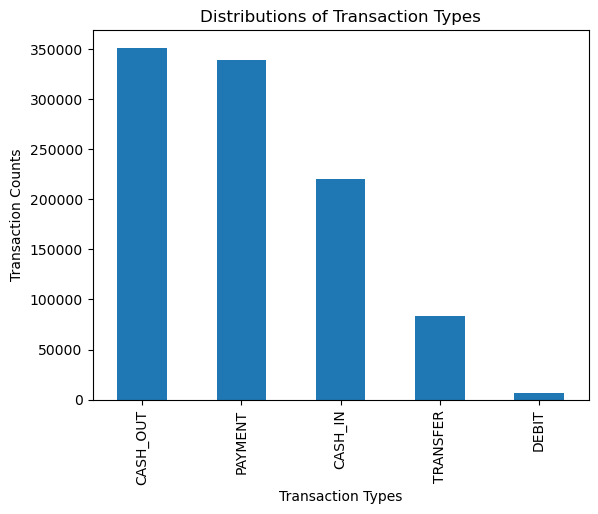

Text(0.5, 1.0, 'Transaction Type Counts')

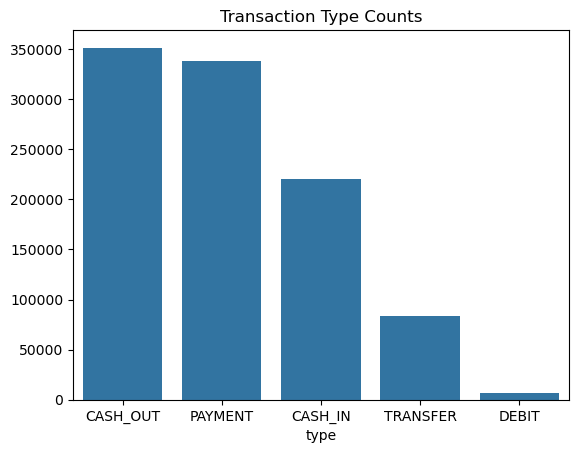

In [76]:
transactions['type'].value_counts().plot(kind='bar', title='Transaction Type Counts')
plt.xlabel("Transaction Types")
plt.ylabel("Transaction Counts")
plt.title("Distributions of Transaction Types")
plt.show()
  
sns.barplot(x=transactions['type'].value_counts().index, y=transactions['type'].value_counts().values)
plt.title("Transaction Type Counts")

In [ ]:
#breaking down transaction types and summary statistics
#renaming cols 
renamed_columns = {
    'amount' : ['mean', 'sum', 'count'],
    'isFraud': ['mean', 'sum']
}
transaction_types = transactions.groupby('type').agg(renamed_columns).reset_index()
transaction_types

type         amount                         isFraud     
                      mean           sum   count      mean  sum
0   CASH_IN  168928.914668  3.715676e+10  219955  0.000000    0
1  CASH_OUT  175584.659320  6.169343e+10  351360  0.001870  657
2     DEBIT    5445.890813  3.494628e+07    6417  0.000000    0
3   PAYMENT   13055.592085  4.420271e+09  338573  0.000000    0
4  TRANSFER  911827.155179  7.631537e+10   83695  0.007647  640

Text(0.5, 1.0, 'Average Transaction Amount by Type')

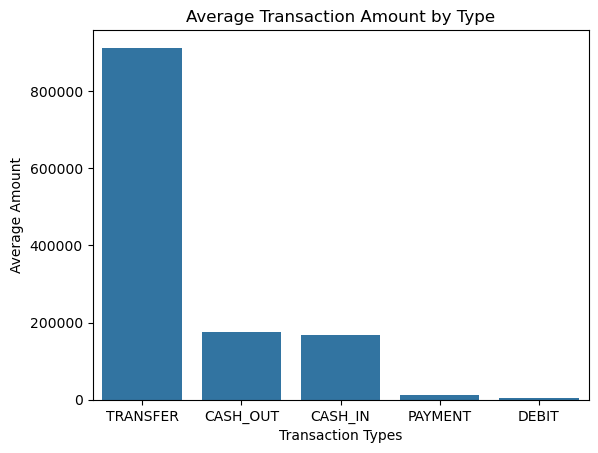

In [85]:
types_sorted = transaction_types.sort_values(by=('amount', 'mean'), ascending=False)
sns.barplot(x= types_sorted['type'], y=types_sorted['amount']['mean'])
plt.xlabel("Transaction Types")
plt.ylabel("Average Amount")
plt.title("Average Transaction Amount by Type")

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Answer here

In [102]:
#Spiltting up fraud(1) vs non fraud(0) counts to observe the counts of fraud vs non-fraud transactions
fraud_counts = transactions[transactions['isFraud'] == 1].count()['isFraud']
non_fraud_counts = transactions[transactions['isFraud'] == 0].count()['isFraud']
print(f"Fraudulent transactions: {fraud_counts}")
print(f"Non-fraudulent transactions: {non_fraud_counts}")

#Observing the counts of flagged fraud transactions
flagged_fraud = transactions[transactions['isFlaggedFraud'] == 1].count()['isFlaggedFraud']
print(f"Flagged Fraudulent transactions: {flagged_fraud}")

Fraudulent transactions: 1297
Non-fraudulent transactions: 998703
Flagged Fraudulent transactions: 1


Text(0.5, 1.0, 'Distributions of Transaction Types')

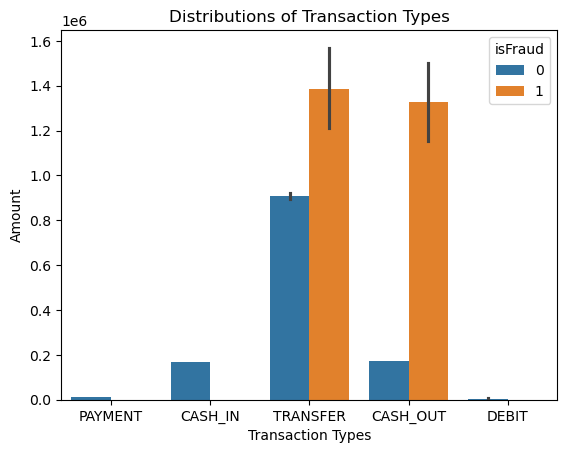

In [ ]:
sns.barplot(x = transactions['type'], y = transactions['amount'], hue=transactions['isFraud'])
plt.xlabel("Transaction Types")
plt.ylabel("Amount")    
plt.title("Distributions of Transaction Types")

Text(0.5, 1.0, 'Distribution of Transaction Types for Non-Fraudulent Transactions')

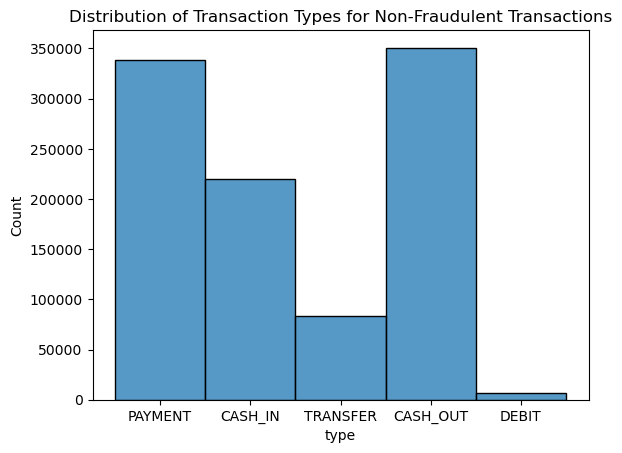

In [ ]:
#Looking at the distribution of transaction types for non fraudulent transactions
sns.histplot(transactions[transactions['isFraud'] == 0]['type'])
plt.title("Distribution of Transaction Types for Non-Fraudulent Transactions")

Text(0.5, 1.0, 'Distribution of Transaction Amounts for Fraudulent Transactions')

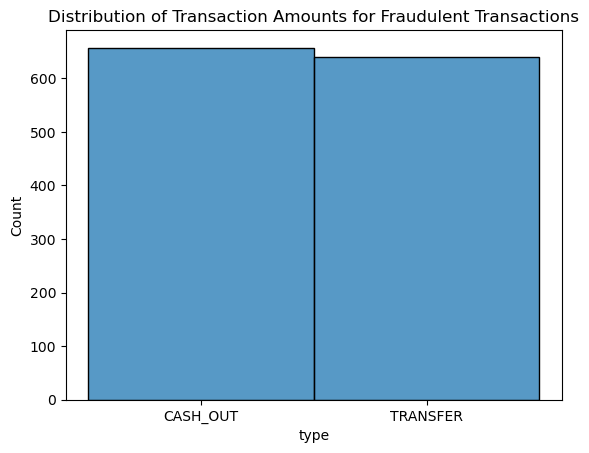

In [93]:
#Looking at the distribution of transaction types for fraudulent transactions
sns.histplot(transactions[transactions['isFraud'] == 1]['type'])
plt.title("Distribution of Transaction Amounts for Fraudulent Transactions")

Text(0.5, 1.0, 'Transaction Type Counts')

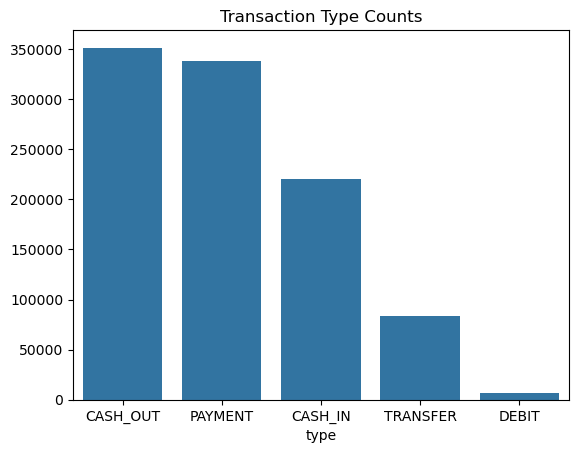

In [86]:
sns.barplot(x = transactions['type'].value_counts().index, y=transactions['type'].value_counts().values)
plt.title("Transaction Type Counts")

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.



In [ ]:
#Spiltting up fraud(1) vs non fraud(0) counts to observe the counts of fraud vs non-fraud transactions
fraud_counts = transactions[transactions['isFraud'] == 1].count()['isFraud']
non_fraud_counts = transactions[transactions['isFraud'] == 0].count()['isFraud']
print(f"Fraudulent transactions: {fraud_counts}")
print(f"Non-fraudulent transactions: {non_fraud_counts}")

#Observing the counts of flagged fraud transactions
flagged_fraud = transactions[transactions['isFlaggedFraud'] == 1].count()['isFlaggedFraud']
print(f"Flagged Fraudulent transactions: {flagged_fraud}")


Fraudulent transactions: 1297
Non-fraudulent transactions: 998703
Flagged Fraudulent transactions: 1


In [ ]:
table1 = pd.pivot_table(transactions, values='isFraud', index='isFlaggedFraud', aggfunc=['sum', 'count'])
table1.columns = ['Fraudulent Count', 'Total Count']
#Percentage = (Part / Whole) × 100
table1['Fraud Rate (%)'] = (table1['Fraudulent Count'] / table1['Total Count']) * 100
table1

,Fraudulent Count,Total Count,Fraud Rate (%)
isFlaggedFraud,,,
0,1296,999999,0.1296
1,1,1,100.0000
